In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline
import pickle

https://healthdata.gov/State/New-York-State-Statewide-COVID-19-Fatalities-by-Ag/7cdh-f4d3

In [2]:
df_hhs = pd.read_csv('https://health.data.ny.gov/api/views/du97-svf7/rows.csv?accessType=DOWNLOAD', parse_dates = ['Report Date'])

In [3]:
df_hhs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7987 entries, 0 to 7986
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Report Date     7987 non-null   datetime64[ns]
 1   Age Group       7987 non-null   object        
 2   Fatality Count  7987 non-null   int64         
 3   Percent         7987 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 249.7+ KB


df_hhs.tail(20)

df_hhs[df_hhs['Age Group'] == '0 to 9'].tail(50)

df_hhs[df_hhs['Age Group'] == '20 to 29'].tail(50)

df_hhs[df_hhs['Age Group'] == '30 to 39'].tail(50)

In [4]:
aaa = df_hhs[df_hhs['Age Group'] =='Statewide Total']

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
bbb = aaa.loc[:,['Report Date','Fatality Count']][-600::]
ccc = bbb.set_index('Report Date')
ddd = ccc.diff(periods = 1)
ddd_rolling = ddd.rolling(7).mean().shift()
print(ddd.tail())
print(ddd_rolling.tail())

             Fatality Count
Report Date                
2022-01-21            184.0
2022-01-22            138.0
2022-01-23            133.0
2022-01-24            159.0
2022-01-25            159.0
             Fatality Count
Report Date                
2022-01-21       171.142857
2022-01-22       170.571429
2022-01-23       167.714286
2022-01-24       164.428571
2022-01-25       161.857143


In [7]:
ddd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2020-06-03 to 2022-01-25
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fatality Count  599 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB


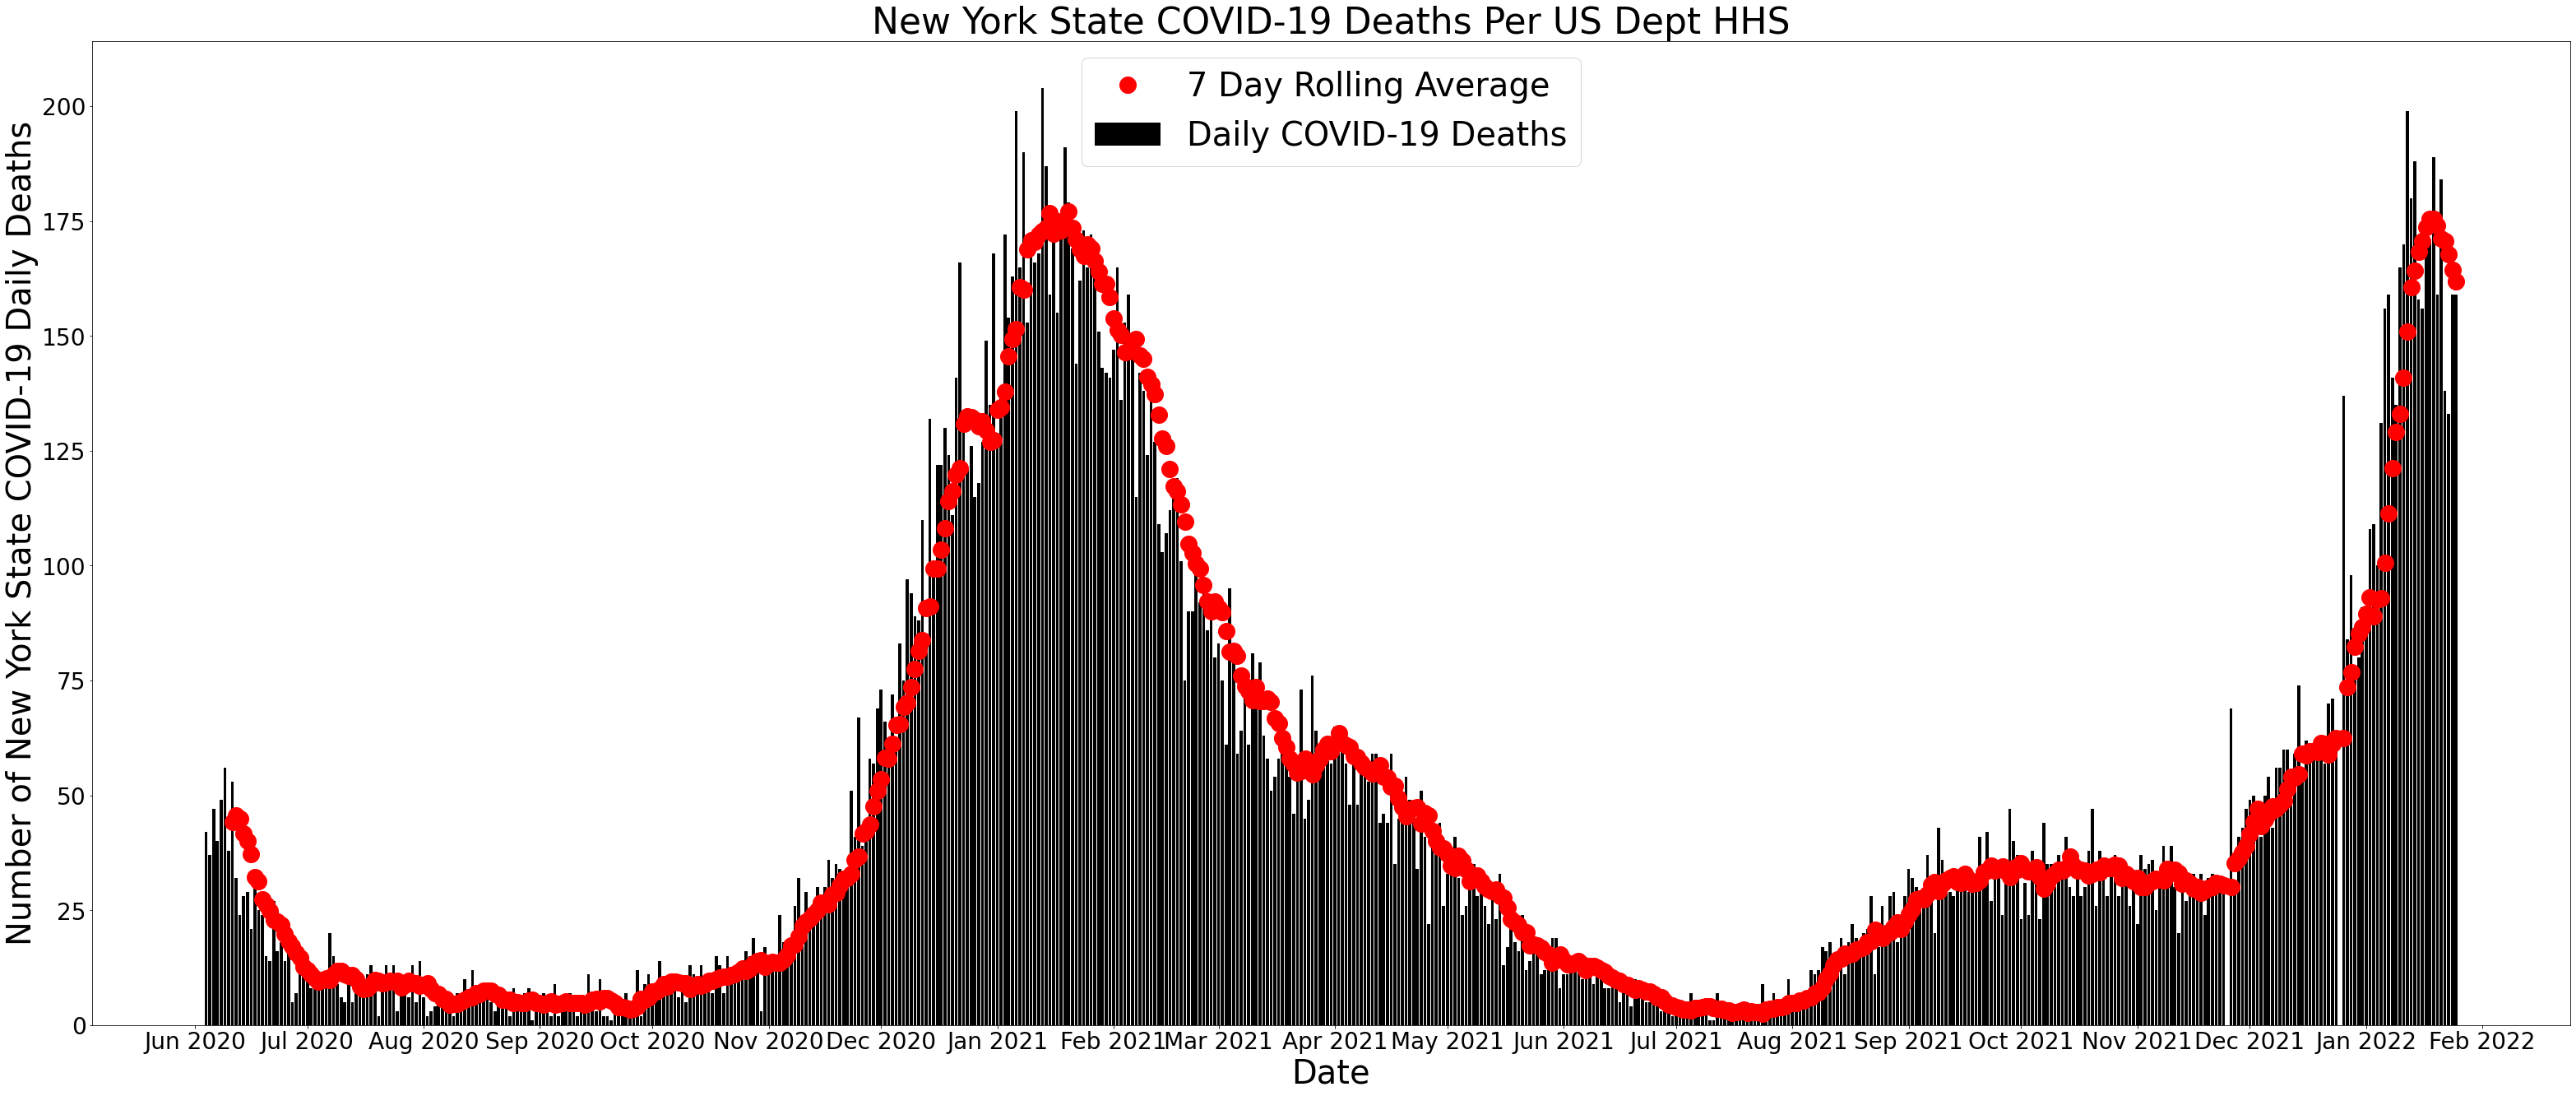

In [8]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('New York State COVID-19 Deaths Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Number of New York State COVID-19 Daily Deaths',color='black', fontsize = 40)
plt.bar(ddd.index, ddd['Fatality Count'], color = 'black')
plt.plot(ddd_rolling['Fatality Count'], 'ro',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths'], fontsize = 40)
#plt.legend(['7 Day Rolling Average','Daily Reported Deaths'])
fig.savefig('HHS_NY_state_deaths.png')